# Introduction
The purpose of this project was to analyze three different datasets. The first two datasets will be analyzed to draw conclusions about:
* (1) popular neighborhood drop-off locations in the Chicagoland area (based on average number of trips). 
* (2) some of the most popular taxi companies (based on number of trips). 
* (3) the third dataset will be analyzed to draw conclusions about different weather conditions and ride duration.

In [114]:
import pandas as pd
import numpy as np
import seaborn as sb
from scipy import stats as st
from math import factorial
import matplotlib.pyplot as plt
import datetime as dt 
from scipy.stats import levene 

In [2]:
company=pd.read_csv('/datasets/project_sql_result_01.csv')
company

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
...,...,...
59,4053 - 40193 Adwar H. Nikola,7
60,2733 - 74600 Benny Jona,7
61,5874 - 73628 Sergey Cab Corp.,5
62,2241 - 44667 - Felman Corp,3


In [3]:
trips= pd.read_csv('/datasets/project_sql_result_04.csv')
trips

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
...,...,...
89,Mount Greenwood,3.137931
90,Hegewisch,3.117647
91,Burnside,2.333333
92,East Side,1.961538


In [4]:
company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [5]:
trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [6]:
company.isna().sum()

company_name    0
trips_amount    0
dtype: int64

In [7]:
trips.isna().sum()

dropoff_location_name    0
average_trips            0
dtype: int64

* All data types in both tables are appropriate. No missing values in either.

In [8]:
trips["dropoff_location_name"].unique()

array(['Loop', 'River North', 'Streeterville', 'West Loop', "O'Hare",
       'Lake View', 'Grant Park', 'Museum Campus', 'Gold Coast',
       'Sheffield & DePaul', 'Lincoln Park', 'East Village',
       'Little Italy, UIC', 'Uptown', 'Near South Side', 'Garfield Ridge',
       'Logan Square', 'Edgewater', 'West Town', 'Old Town',
       'Rush & Division', 'North Center', 'Lincoln Square', 'Rogers Park',
       'West Ridge', 'Irving Park', 'Hyde Park', 'Avondale',
       'Wicker Park', 'Albany Park', 'United Center', 'Lower West Side',
       'Douglas', 'Portage Park', 'Humboldt Park', 'Norwood Park',
       'Kenwood', 'Bridgeport', 'Armour Square', 'Jefferson Park',
       'Bucktown', 'North Park', 'Garfield Park', 'Mckinley Park',
       'Belmont Cragin', 'Boystown', 'Chinatown', 'Grand Boulevard',
       'Austin', 'Sauganash,Forest Glen', 'South Shore', 'Woodlawn',
       'Little Village', 'Jackson Park', 'North Lawndale', 'Dunning',
       'Ukrainian Village', 'Hermosa', 'Englewood'

In [25]:
new_data = trips.sort_values(by="average_trips", ascending=False).head(11)
new_data

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


* The Above list will be used to identify the top 10 drop-off locations based on average number of trips.

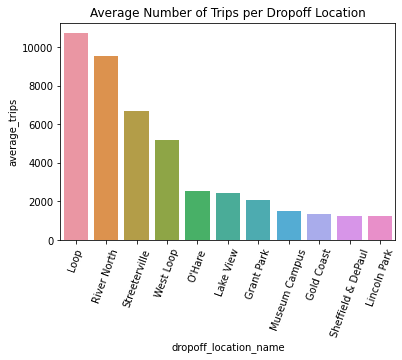

In [26]:
plot = sb.barplot(x="dropoff_location_name", y="average_trips", data=new_data)
plt.title("Average Number of Trips per Dropoff Location")
plot.set_xticklabels(plot.get_xticklabels(),rotation=70)
plt.show()

* The above locations are the top 10 neighborhoods based on average number of trips.

In [51]:
company["company_name"].nunique()
company.info()
company.head(15)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
5,Chicago Carriage Cab Corp,9181
6,City Service,8448
7,Sun Taxi,7701
8,Star North Management LLC,7455
9,Blue Ribbon Taxi Association Inc.,5953


In [52]:
b=company.sort_values(by="trips_amount", ascending=False).head(14)

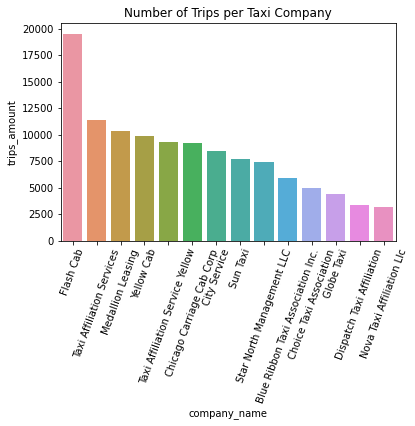

In [53]:
comp = sb.barplot(x="company_name", y="trips_amount", data=b)
plt.title("Number of Trips per Taxi Company")
comp.set_xticklabels(comp.get_xticklabels(),rotation=70)
plt.show()

* The graph above shows the top 13 taxi companies based on number of of trips.

In [58]:
weather=pd.read_csv('/datasets/project_sql_result_07.csv')
weather.isna().sum()
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


In [69]:
weather["start_ts"] =pd.to_datetime(weather["start_ts"], format='%Y-%m-%d')
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            1068 non-null   datetime64[ns]
 1   weather_conditions  1068 non-null   object        
 2   duration_seconds    1068 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 25.2+ KB


In [59]:
weather

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0
...,...,...,...
1063,2017-11-25 11:00:00,Good,0.0
1064,2017-11-11 10:00:00,Good,1318.0
1065,2017-11-11 13:00:00,Good,2100.0
1066,2017-11-11 08:00:00,Good,1380.0


In [115]:
weather["day_of_week"] = weather["start_ts"].dt.dayofweek


In [86]:
weather["day_of_week"]

0       5
1       5
2       5
3       5
4       5
       ..
1063    5
1064    5
1065    5
1066    5
1067    5
Name: day_of_week, Length: 1068, dtype: int64

In [93]:
rain_sat=weather.query('weather_conditions == "Bad"')
non_rain_sat=weather.query('weather_conditions == "Good"')


In [90]:
rain_sat

,start_ts,weather_conditions,duration_seconds,day_of_week
6,2017-11-04 16:00:00,Bad,2969.0,5
30,2017-11-18 12:00:00,Bad,1980.0,5
34,2017-11-04 17:00:00,Bad,2460.0,5
51,2017-11-04 16:00:00,Bad,2760.0,5
52,2017-11-18 12:00:00,Bad,2460.0,5
...,...,...,...,...
1031,2017-11-18 12:00:00,Bad,2560.0,5
1032,2017-11-18 10:00:00,Bad,1908.0,5
1053,2017-11-18 12:00:00,Bad,2400.0,5
1061,2017-11-18 16:00:00,Bad,2186.0,5


In [105]:
a= rain_sat.groupby("weather_conditions")["duration_seconds"]
b= non_rain_sat.groupby("weather_conditions")["duration_seconds"]

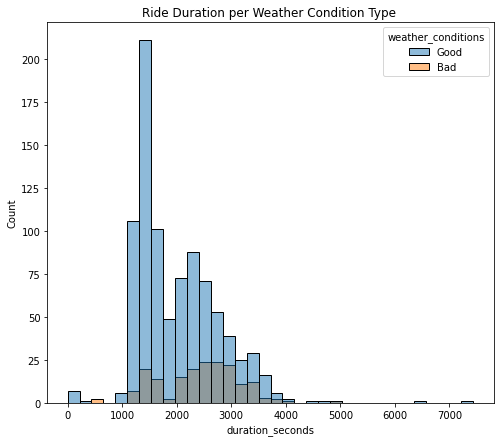

Rainy Saturdays: Average for duration_seconds is weather_conditions
Bad    2427.0
Name: duration_seconds, dtype: float64
Rainy Saturdays: Variance for duration_seconds is weather_conditions
Bad    520294.0
Name: duration_seconds, dtype: float64
Rainy Saturdays: SD for duration_seconds is weather_conditions
Bad    721.0
Name: duration_seconds, dtype: float64
Non-rainy Saturdays: Average for duration_seconds is weather_conditions
Good    2000.0
Name: duration_seconds, dtype: float64
Non-rainy Saturdays: Variance for duration_seconds is weather_conditions
Good    576382.0
Name: duration_seconds, dtype: float64
Non-rainy Saturdays: SD for duration_seconds is weather_conditions
Good    759.0
Name: duration_seconds, dtype: float64


In [111]:

def weather_stats(duration_seconds):
    fig, ax=plt.subplots(figsize=(8,7))
    ax=sb.histplot(weather, x="duration_seconds", hue="weather_conditions")
    
    rain_mean= round(a.mean())
    rain_var= round(a.var())
    rain_std= round(a.std())
    non_rain_mean=round(b.mean())
    non_rain_var= round(b.var())
    non_rain_std= round(b.std())
    plt.title("Ride Duration per Weather Condition Type ")
    plt.show()
    print("Rainy Saturdays: Average for", duration_seconds, "is", rain_mean)
    print("Rainy Saturdays: Variance for", duration_seconds, "is", rain_var)
    print("Rainy Saturdays: SD for", duration_seconds, "is", rain_std)

    print("Non-rainy Saturdays: Average for", duration_seconds, "is", non_rain_mean)
    print("Non-rainy Saturdays: Variance for", duration_seconds, "is", non_rain_var)
    print("Non-rainy Saturdays: SD for", duration_seconds, "is", non_rain_std)

weather_stats("duration_seconds")

Based on the calculations above, it appears that rainy days do seem to have a longer average ride duration (2427 seconds) as compared to non-rainy days (2000 seconds).

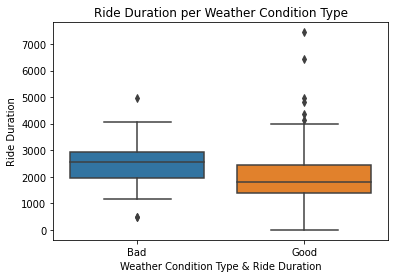

In [113]:
h=weather.pivot(columns="weather_conditions", values="duration_seconds")
sb.boxplot(data=h)
plt.xlabel("Weather Condition Type & Ride Duration")
plt.ylabel("Ride Duration")
plt.title("Ride Duration per Weather Condition Type")
plt.show()



* Again, here we see that the median ride duration for "bad" or rainy weather appears to be hihger than that of "good" or non-rainy weather. 

# HYPOTHESIS TESTING
* H0:The average duration of rides from the Loop to O'Hare International Airport does not change on rainy Saturdays.
* H1:The average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays.

In [121]:
sample1=rain_sat["duration_seconds"]
sample2=non_rain_sat["duration_seconds"]
print(sample1, sample2)
print(len(sample1))
print(len(sample2))

6       2969.0
30      1980.0
34      2460.0
51      2760.0
52      2460.0
         ...  
1031    2560.0
1032    1908.0
1053    2400.0
1061    2186.0
1067    2834.0
Name: duration_seconds, Length: 180, dtype: float64 0       2410.0
1       1920.0
2       1543.0
3       2512.0
4       1440.0
         ...  
1062    1500.0
1063       0.0
1064    1318.0
1065    2100.0
1066    1380.0
Name: duration_seconds, Length: 888, dtype: float64
180
888


In [117]:
pvalue_lev= st.levene(sample1, sample2)
pvalue_lev
print("Variance of sample 1 & 2 are not equal", pvalue_lev)

Variance of sample 1 & 2 are not equal LeveneResult(statistic=0.38853489683656073, pvalue=0.5332038671974493)


In [118]:
print("Null & Alternative Hypotheses:")
print("H0:The average duration of rides from the Loop to O'Hare International Airport does not change on rainy Saturdays.")
print("H1:The average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays.") 

Null & Alternative Hypotheses:
H0:The average duration of rides from the Loop to O'Hare International Airport does not change on rainy Saturdays.
H1:The average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays.


In [119]:
def t_test(sample1, sample2, alpha=.05):
    p_value_levene=st.levene(sample1,sample2).pvalue
    if p_value_levene < alpha:
        option_var=False
    else:
        option_var=True
    p_value= st.ttest_ind(sample1, sample2, equal_var=option_var).pvalue
    print("P_value, ", p_value)
    if p_value < alpha:
        print("Reject H0, the average ride duration on rainy Saturdays are not equal to the average ride duration on non-rainy Saturdays")
    else:
        print("Fail to reject H0, the average ride duration on rainy Saturdays are equal to the average ride duration on non-rainy Saturdays")
t_test(sample1, sample2)

P_value,  6.517970327099473e-12
Reject H0, the average ride duration on rainy Saturdays are not equal to the average ride duration on non-rainy Saturdays


# Conclusion
* This dataset was modified by adding ["day_of_week"] column for readability and dates in the ["start_ts"] column were converted to datetime.Upon conducting an independent samples t-test, the results indicate that the average ride duration on rainy Saturdays differ from the average ride duration on non-rainy days (p-value=6.51e-12, alpha=0.05).

* It is imprtant to note that the sample sizes of each group were greatly disproportionate, with non-rain data containing 888 rows as opposed to rainy data containing 180 rows. Noteablely, this dataset contains nearly 5 times more non-rain data than rain data. Further statistical tests should be conducted utilizing larger samples (and equal samples) in order to better understand in more detail how these samples differ and in what direction. Nevertheless, these results do suggest that ride duration may differ based on these different weather conditions.
